# LLC Extraction

In [1]:
# imports
import os
import numpy as np

import pandas

import h5py

from matplotlib import pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.ticker as mticker

import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import seaborn as sns

from ulmo.utils import image_utils

# First one was run to grab the mapping

## ulmo_extract_llc --debug

# Explore that

## Load

In [4]:
ex_file = os.path.join(os.getenv('SST_OOD'), 'LLC', 'Extractions', 
                       'debug_one_for_coords.h5')

In [5]:
f = h5py.File(ex_file, mode='r')

In [6]:
f.keys()

<KeysViewHDF5 ['fields', 'masks', 'metadata']>

## Metadata

In [8]:
meta = f['metadata']
df = pandas.DataFrame(meta[:].astype(np.unicode_), columns=meta.attrs['columns'])

In [9]:
df.head()

,filename,row,column,latitude,longitude,clear_fraction
0,LLC4320_2012-02-03T00_00_00.nc,1752,11040,-78.20546,-163.75221,0.0478515625
1,LLC4320_2012-02-03T00_00_00.nc,1756,11024,-78.19663,-164.12633,0.04541015625
2,LLC4320_2012-02-03T00_00_00.nc,1757,11056,-78.154976,-163.45134,0.04541015625
3,LLC4320_2012-02-03T00_00_00.nc,1759,11018,-78.18334,-164.27869,0.0498046875
4,LLC4320_2012-02-03T00_00_00.nc,1768,11008,-78.1345,-164.56404,0.041259765625


## Spatial plot

In [13]:
df.latitude = df.latitude.values.astype(float)
df.longitude = df.longitude.values.astype(float)

In [14]:
# Healpix me
nside = 32
hp_events, hp_lons, hp_lats = image_utils.evals_to_healpix(
    df, nside, log=False, mask=True)

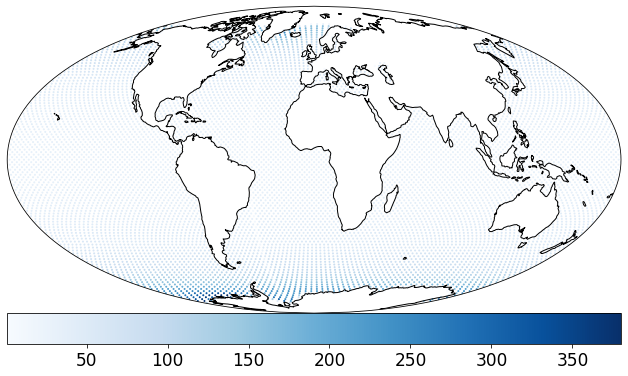

In [15]:
fig = plt.figure(figsize=(11, 7))
plt.clf()

tformM = ccrs.Mollweide()
tformP = ccrs.PlateCarree()

ax = plt.axes(projection=tformM)


cm = plt.get_cmap('Blues')
# Cut
good = np.invert(hp_events.mask)
img = plt.scatter(x=hp_lons[good],
    y=hp_lats[good],
    c=hp_events[good],
    cmap=cm,
    s=1,
    transform=tformP)
#
# Colorbar
cb = plt.colorbar(img, orientation='horizontal', pad=0.)
#clbl=r'$\log_{10} \, N_{\rm '+'{}'.format(lbl)+'}$'
#cb.set_label(clbl, fontsize=20.)
cb.ax.tick_params(labelsize=17)

# Coast lines
ax.coastlines(zorder=10)
ax.set_global()

#
#plt.savefig('aph_spatial_1st.png', dpi=300)

plt.show()

## Output for PC

In [16]:
df.to_csv('LLC_first_extractions.csv')

In [17]:
df

,filename,row,column,latitude,longitude,clear_fraction
0,LLC4320_2012-02-03T00_00_00.nc,1752,11040,-78.205460,-163.75221,0.0478515625
1,LLC4320_2012-02-03T00_00_00.nc,1756,11024,-78.196630,-164.12633,0.04541015625
2,LLC4320_2012-02-03T00_00_00.nc,1757,11056,-78.154976,-163.45134,0.04541015625
3,LLC4320_2012-02-03T00_00_00.nc,1759,11018,-78.183340,-164.27869,0.0498046875
4,LLC4320_2012-02-03T00_00_00.nc,1768,11008,-78.134500,-164.56404,0.041259765625
...,...,...,...,...,...,...
473976,LLC4320_2012-02-03T00_00_00.nc,12895,10588,71.716606,-177.66539,0.049560546875
473977,LLC4320_2012-02-03T00_00_00.nc,12895,11619,70.833010,-151.49582,0.048828125
473978,LLC4320_2012-02-03T00_00_00.nc,12895,11648,70.771120,-150.80946,0.042724609375
473979,LLC4320_2012-02-03T00_00_00.nc,12895,13632,69.241840,-117.67405,0.046875


In [18]:
360*180. 

64800.0